In [36]:
import targetexplore

In [37]:
import importlib
importlib.reload(targetexplore)
importlib.reload(targetexplore.targets)
importlib.reload(targetexplore.gaia)

<module 'targetexplore.gaia' from '/datax/users/obs/osea/seticore/python/targetexplore/gaia.py'>

In [38]:
import numpy as np
from astropy.coordinates import SkyCoord
from astropy import units as u
from targetexplore import Targets

In [39]:
# List of LADUMA main and offset pointings (RA in hms, Dec in dms)
ra_list = [
    "03h32m30s",  # Main
    #"03h32m30s",  # Offset North
    #"03h32m30s",  # Offset South
    #"03h33m30s",  # Offset East
    #"03h31m30s",  # Offset West
]

dec_list = [
    "-28d07m57s",  # Main
    #"-27d57m57s",  # North
    #"-28d17m57s",  # South
    #"-28d07m57s",  # East
    #"-28d07m57s",  # West
]

pointings = SkyCoord(ra=ra_list, dec=dec_list, frame="icrs")

In [40]:
tgts = Targets(
    pointings,
    telescope="MeerKAT", band="5b",
    quality_cut=False
)

INFO: Query finished. [astroquery.utils.tap.core]


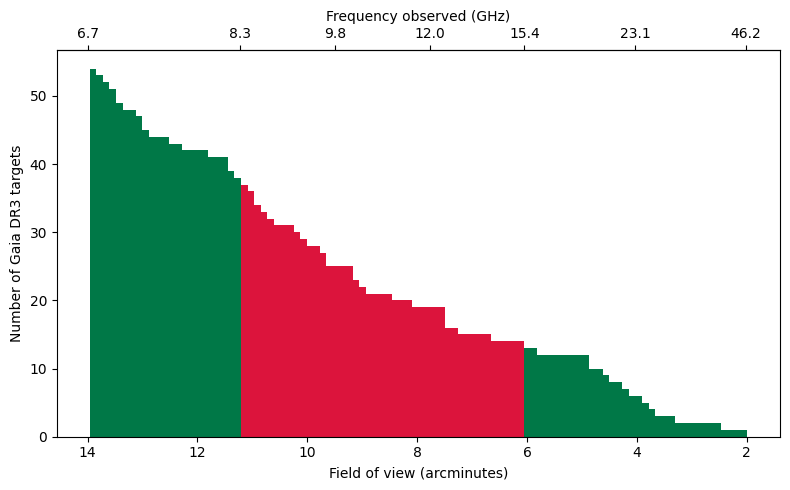

In [41]:
tgts.hist_separation()

<Axes: xlabel='distance (pc)', ylabel='number of targets'>

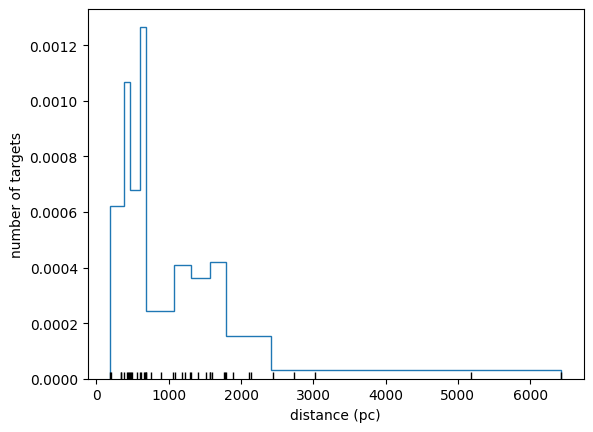

In [42]:
tgts.hist_distance(bins=1/10)

(<Axes: title={'center': 'Hertzsprung–Russell Diagram'}, xlabel='BP − RP', ylabel='Absolute G magnitude (M_G)'>,
 <Figure size 700x600 with 2 Axes>,
 <Axes: title={'center': 'HR using naive distance'}, xlabel='BP - RP', ylabel='Absolute G magnitude'>)

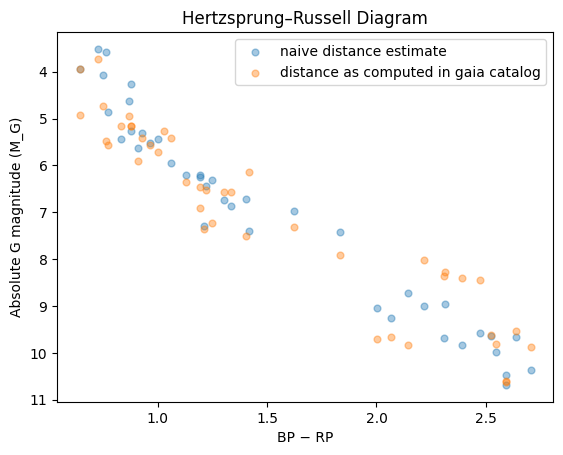

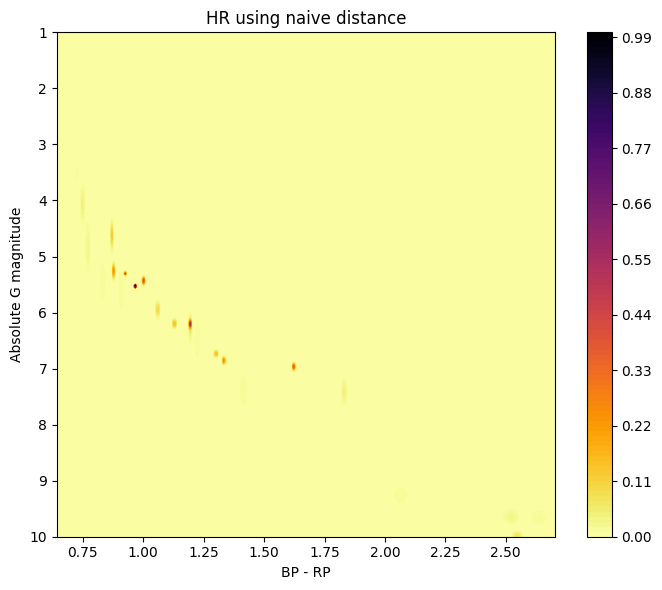

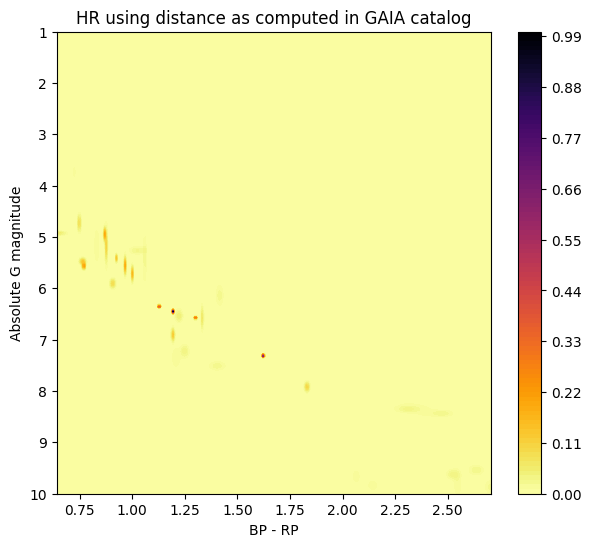

In [43]:
tgts.hr(bayes=False, cmap="inferno_r")